In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
#import random
%matplotlib inline
from matplotlib import animation
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive, fixed
import scipy.integrate as integrate

from matplotlib import animation
from IPython.display import HTML

The particle is in an infinite potential well that goes from 0 to $a$. The eigenfunctions are 
$$u_n(x) = \sqrt{\frac{2}{a}} \sin \frac{n \pi x}{a}$$
The energies are 
$$E_n = \frac{\hbar^2 \pi^2}{2ma^2} n^2$$
For ease of plotting, we will set $\hbar$ and $m$ to one. This is a common way to scale computational work so you don't have worry about weird constants. 

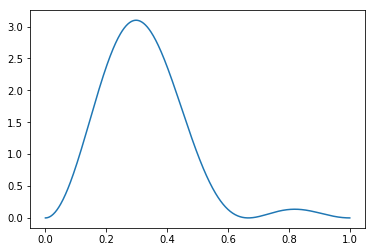

In [2]:
#width of the well
a=1
#number of points to plot
x_s=500
#set up x vector
x = np.linspace(0, a, x_s)
t=0

psix = (1/np.sqrt(2))*(np.sqrt(2/a)*np.sin(np.pi*x)*np.exp(1j*np.pi**2*t/2)+ np.sqrt(2/a)*np.sin(2*np.pi*x)*np.exp(1j*np.pi**2*t*4/2))
plt.plot(x,np.real(psix**2))

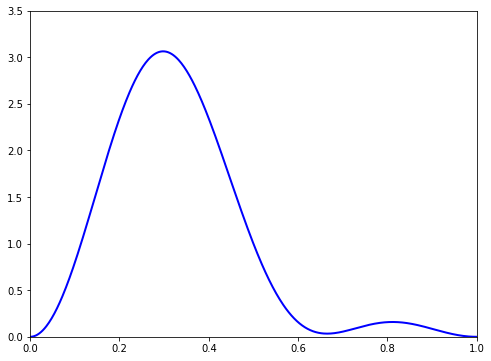

In [3]:
myfigsize=(8,6);

#outerlim = 0.6
fig = plt.figure(figsize=myfigsize);
ax = plt.axes(xlim=(0, a), ylim=(0, 3.5));
line, = ax.plot([], [], lw=2, color='blue');

#timestep that changes the time step between frames
tstep=100

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

def animate(t):
    #x = np.linspace(-a/2, a/2, x_s)
    psi=(1/np.sqrt(2))*(np.sqrt(2/a)*np.sin(np.pi*x)*np.exp(1j*np.pi**2*(t/tstep)/2)+ np.sqrt(2/a)*np.sin(2*np.pi*x)*np.exp(1j*np.pi**2*(t/tstep)*4/2));

    y=np.real(psi*np.conj(psi));      

    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=42, interval=50, blit=True);
HTML(ani.to_jshtml())
#ani